In [ ]:


# ---- WHEATHER FORECASTING USING SPARK AND HDFS ----

# --- NITISH S ---



In [34]:
from pyspark.sql import SparkSession

spark=SparkSession(sc)

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


In [3]:

# --- 2018 ---

df1 =spark.read.option('header','true').csv("/bd/bdn1.csv",inferSchema=True)
df2 =spark.read.option('header','true').csv("/bd/bdn2.csv",inferSchema=True)
df3 =spark.read.option('header','true').csv("/bd/bdn3.csv",inferSchema=True)
df4 =spark.read.option('header','true').csv("/bd/bdn4.csv",inferSchema=True)
df5 =spark.read.option('header','true').csv("/bd/bdn5.csv",inferSchema=True)
df6 =spark.read.option('header','true').csv("/bd/bdn6.csv",inferSchema=True)
df7 =spark.read.option('header','true').csv("/bd/bdn7.csv",inferSchema=True)
df8 =spark.read.option('header','true').csv("/bd/bdn8.csv",inferSchema=True)
df9 =spark.read.option('header','true').csv("/bd/bdn9.csv",inferSchema=True)
df10 =spark.read.option('header','true').csv("/bd/bdn10.csv",inferSchema=True)
df11=spark.read.option('header','true').csv("/bd/bdn11.csv",inferSchema=True)
df12 =spark.read.option('header','true').csv("/bd/bdn12.csv",inferSchema=True)


In [4]:

# --- 2018 ---

df1 = df1.toPandas()
df2 = df2.toPandas()
df3 = df3.toPandas()
df4 = df4.toPandas()
df5 = df5.toPandas()
df6 = df6.toPandas()

In [5]:
df7 = df7.toPandas()
df8 = df8.toPandas()
df9 = df9.toPandas()
df10= df10.toPandas()
df11= df11.toPandas()
df12= df12.toPandas()

In [6]:

# --- COMBINING ALL THE DATASETS ---

frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12 ]

df = pd.concat(frames)

In [36]:
df.head()

,_c0,sensor_id,location,lat,lon,pressure,temperature,humidity
timestamp,,,,,,,,
2018-01-01 00:00:04,9,6088,3072,42.687,23.354,95228.48,2.90,66.34
2018-01-01 00:00:06,17,6585,3328,42.676,23.321,95165.64,1.27,72.67
2018-01-01 00:00:12,33,6228,3147,42.695,23.281,95305.45,2.70,66.35
2018-01-01 00:00:19,52,6140,3101,42.664,23.284,94762.95,0.43,83.54
2018-01-01 00:00:24,65,2224,1118,42.651,23.335,94961.47,1.36,72.57


In [7]:
df.isnull().sum()

_c0             0
sensor_id       0
location        0
lat             0
lon             0
timestamp       0
pressure       65
temperature     0
humidity        3
dtype: int64

In [8]:
df = df.fillna(method='ffill')
df.isnull().sum()

_c0            0
sensor_id      0
location       0
lat            0
lon            0
timestamp      0
pressure       0
temperature    0
humidity       0
dtype: int64

In [10]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')
df = df.set_index('timestamp')

<AxesSubplot:xlabel='timestamp'>

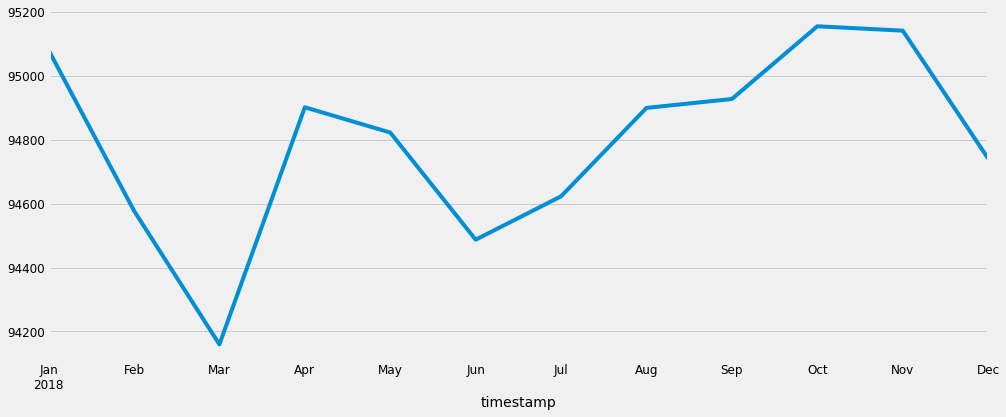

In [11]:

# --- PRESSURE ---


y = df['pressure'].resample('M').mean().ffill()

y.plot(figsize=(15, 6))


In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


In [13]:
warnings.filterwarnings("ignore") 
min_aic = 0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:285.3186782010501
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:254.24882306607782
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:146.93410200292357
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0,

In [14]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

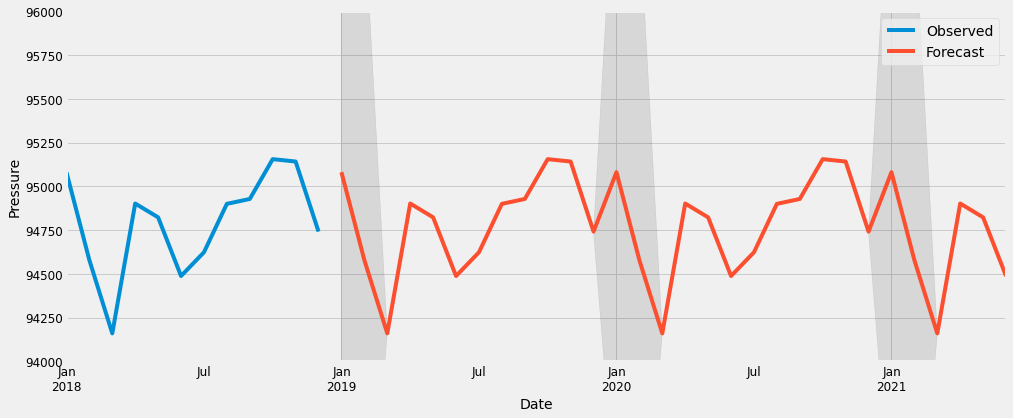

In [18]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = y['2018':].plot(label='Observed', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Pressure')

plt.legend()
plt.ylim(94000,96000)

plt.show()

In [19]:
results.forecast(steps=12)

2019-01-31    95080.830221
2019-02-28    94578.198500
2019-03-31    94159.565029
2019-04-30    94901.918655
2019-05-31    94822.753276
2019-06-30    94487.392559
2019-07-31    94623.108540
2019-08-31    94899.962371
2019-09-30    94927.823058
2019-10-31    95155.461180
2019-11-30    95141.798687
2019-12-31    94741.359555
Freq: M, dtype: float64

In [20]:
print(results.get_forecast().summary_frame(alpha=0.10))

pressure            mean    mean_se  mean_ci_lower  mean_ci_upper
2019-01-31  95080.830221  1000.0005   93435.975772    96725.68467


<AxesSubplot:xlabel='timestamp'>

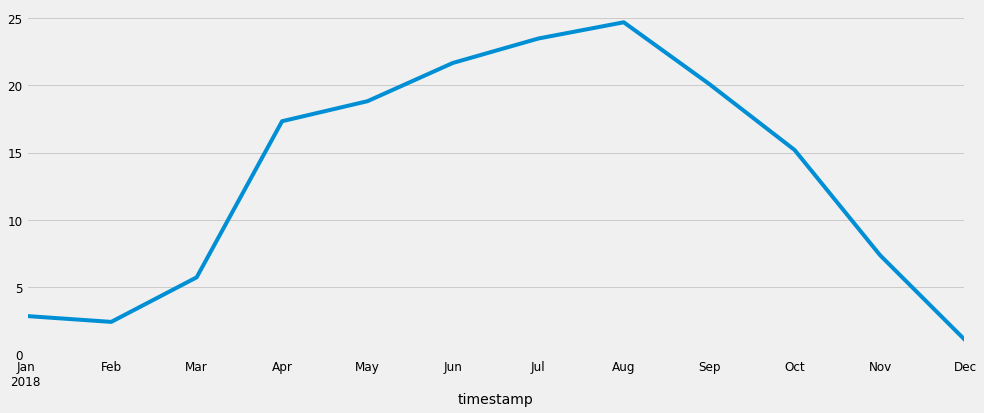

In [21]:
# --- TEMPARATURE ---


y1 = df['temperature'].resample('M').mean().ffill()

y1.plot(figsize=(15, 6))

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
min_aic = 0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod1 = sm.tsa.statespace.SARIMAX(y1,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results1 = mod1.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results1.aic))
            
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:94.95982230254855
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:78.80604434111709
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:64.60331980842633
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 1

In [23]:
mod1 = sm.tsa.statespace.SARIMAX(y1,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results1 = mod1.fit()

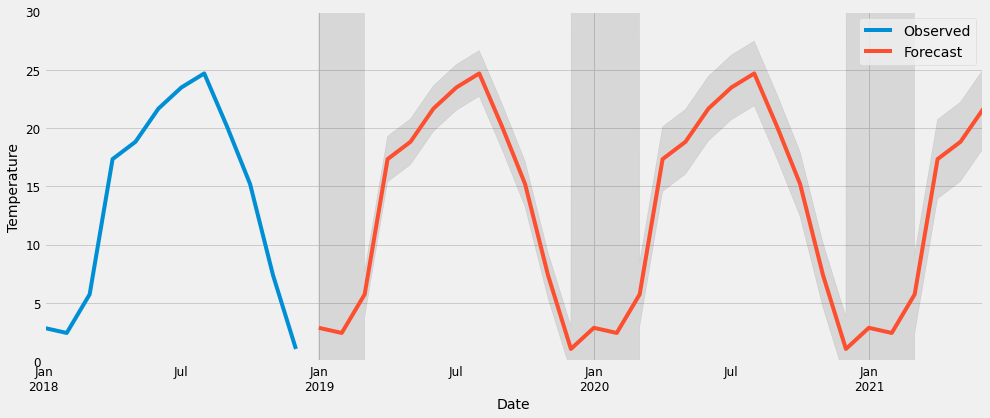

In [37]:
pred_uc = results1.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = y1['2018':].plot(label='Observed', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

plt.legend()
plt.ylim(0,30)
plt.show()

In [25]:
results1.forecast(steps=12)

2019-01-31     2.870010
2019-02-28     2.430931
2019-03-31     5.740585
2019-04-30    17.333017
2019-05-31    18.820612
2019-06-30    21.662386
2019-07-31    23.474367
2019-08-31    24.680006
2019-09-30    20.100368
2019-10-31    15.198647
2019-11-30     7.389194
2019-12-31     1.057191
Freq: M, dtype: float64

In [26]:
print(results1.get_forecast().summary_frame(alpha=0.10))

temperature     mean    mean_se  mean_ci_lower  mean_ci_upper
2019-01-31   2.87001  1000.0005   -1641.984439    1647.724459


<AxesSubplot:xlabel='timestamp'>

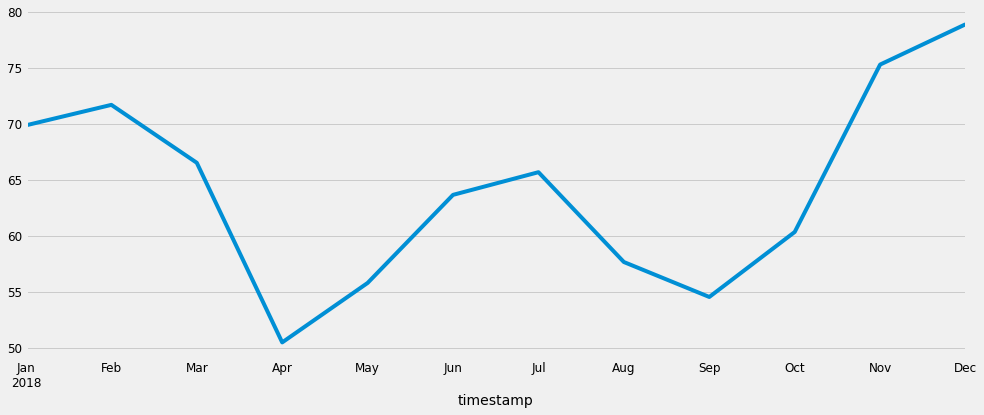

In [27]:
# --- HUMIDITY ---


y2 = df['humidity'].resample('M').mean().ffill()

y2.plot(figsize=(15, 6))

In [28]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
min_aic = 0

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod2 = sm.tsa.statespace.SARIMAX(y2,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results2 = mod2.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results2.aic))
            
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:124.80557453305404
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:105.34500923588912
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:73.16693531425652
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
SARIMAX(0,

In [29]:
mod2 = sm.tsa.statespace.SARIMAX(y2,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod2.fit()

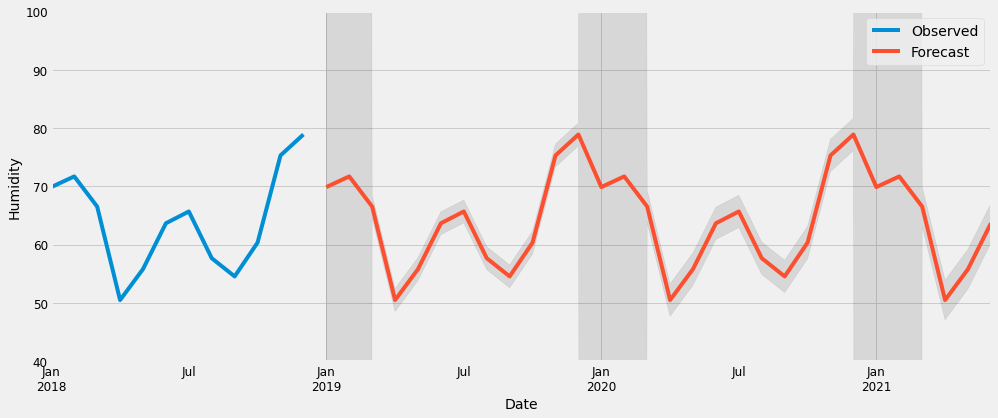

In [30]:
pred_uc = results2.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = y2['2018':].plot(label='Observed', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.1)

ax.set_xlabel('Date')
ax.set_ylabel('Humidity')

plt.legend()
plt.ylim(40,100)
plt.show()

In [31]:
results2.forecast(steps=12)

2019-01-31    69.874456
2019-02-28    71.701436
2019-03-31    66.531817
2019-04-30    50.501265
2019-05-31    55.807784
2019-06-30    63.668591
2019-07-31    65.691673
2019-08-31    57.674507
2019-09-30    54.555322
2019-10-31    60.355890
2019-11-30    75.296389
2019-12-31    78.892597
Freq: M, dtype: float64

In [32]:
print(results2.get_forecast().summary_frame(alpha=0.10))

humidity         mean    mean_se  mean_ci_lower  mean_ci_upper
2019-01-31  69.874456  1000.0005   -1574.979993    1714.728906
